In [1]:
# using DifferentialEquations
using OrdinaryDiffEq

In [2]:
θ_10, v_30, θ_30, v_10, v_20, θ_20 = (0.3194800988544246,1.004422950206025,0.18428849279891663,1.03,1.0,0.0)

(0.3194800988544246, 1.004422950206025, 0.18428849279891663, 1.03, 1.0, 0.0)

In [3]:
δ0,ω0,i_13d0,i_13q0,i_32d0,i_32q0,i_30d0,i_30q0,i_d0,i_q0,v_1d0,v_1q0,v_3d0,v_3q0,e_q_prime0=(0.5234150168964284, 1.0, 0.9140869456592338, 0.15496961898679446, 0.9140869456592343, 0.1549696189867984, 0.0, 0.0, 0.9140869456592338, 0.15496961898679446, 0.9778807983015357, 0.32349519983015396, 0.9874149369646668, 0.18405761369646703, 1.0860978344878298)

(0.5234150168964284, 1.0, 0.9140869456592338, 0.15496961898679446, 0.9140869456592343, 0.1549696189867984, 0.0, 0.0, 0.9140869456592338, 0.15496961898679446, 0.9778807983015357, 0.32349519983015396, 0.9874149369646668, 0.18405761369646703, 1.0860978344878298)

In [4]:
v_1 = v_10*exp(im*θ_10)
v_2 = v_20*exp(im*θ_20)
v_3 = v_30*exp(im*θ_30)

v_1d0 = real(v_1)
v_1q0 = imag(v_1)

v_2d0 = real(v_2)
v_2q0 = imag(v_2)

v_3d0 = real(v_3)
v_3q0 = imag(v_3)

i_30d0 = 0
i_30q0 = 0

i_13d0 = i_d0
i_13q0 = i_q0

0.15496961898679446

In [5]:
# u0 = [δ0,ω0,i_13d0,i_13q0,i_32d0,i_32q0,i_30d0,i_30q0,i_d0,i_q0,v_1d0,v_1q0,v_3d0,v_3q0]
u0 = [δ0,ω0,i_13d0,i_13q0,i_32d0,i_32q0,i_30d0,i_30q0,v_1d0,v_1q0,v_3d0,v_3q0]
# u0 = [δ0,ω0,i_13d0,i_13q0,i_32d0,i_32q0,i_30d0,i_30q0,v_1d0,v_1q0]

k = 0

p = [k,e_q_prime0];

In [29]:
function fx!(du,u,p,t)
    # δ,ω,i_13d,i_13q,i_32d,i_32q,i_30d,i_30q,i_d,i_q,v_1d,v_1q,v_3d,v_3q=u
    δ,ω,i_13d,i_13q,i_32d,i_32q,i_30d,i_30q,v_1d,v_1q,v_3d,v_3q=u

    k, e_q_prime0 = p
    
    e_q_prime = e_q_prime0
    x_d_prime = 0.24
    p_m = 0.944
    H = 3.5
    Ω = 2π*60
    
    d = 1

    R1 = 0.015
    R2 = 0.0198
    w_L1 = 0.15
    w_L2 = 0.198

    w_L3 = 1e-2
    R3 = 1e-2

    L1 = w_L1/Ω
    L2 = w_L2/Ω
    L3 = w_L3/Ω

    Rs = k*R3 + abs(k-1)*1e100
    Ls = k*L3 + abs(k-1)*1e100

    v_2 = 1.0
    θ_2 = 0.0

    v_2 = v_2*exp(im*θ_2)

    v_2d = real(v_2)
    v_2q = imag(v_2)


    du[1] = Ω*(ω-1)
    du[2] = (p_m - ((v_1d)*i_13d + (v_1q)*i_13q) - d*(ω-1))/(2H)

    # # ## L1 equation
    du[3] = (v_1d)/L1 - (v_3d)/L1 - R1*i_13d/L1 + Ω*i_13q
    du[4] = (v_1q)/L1 - (v_3q)/L1 - R1*i_13q/L1 - Ω*i_13d

    # # # ## L2 equation
    du[5] = (v_3d)/L2 - (v_2d)/L2 - R2*i_32d/L2 + Ω*i_32q
    du[6] = (v_3q)/L2 - (v_2q)/L2 - R2*i_32q/L2 - Ω*i_32d

    ## R3 equation
    du[7] = v_3d/Rs - i_30d
    du[8] = v_3q/Rs - i_30q
    # v_3d: R_s*i_30d, v_3q: R_s*i_30q
    

    # # # ## L3 equation
    # du[7] = v_3d/Ls - Rs*i_30d/Ls + Ω*i_30q
    # du[8] = v_3q/Ls - Rs*i_30q/Ls - Ω*i_30d
    

    du[9]  = v_1d - x_d_prime*i_13q + e_q_prime*sin(δ-π/2)
    du[10] = v_1q - e_q_prime*cos(δ-π/2) + i_13d*x_d_prime

    # ## bus 1
    # du[11] = i_d - i_13d
    # du[12] = i_q - i_13q
    
    ## bus 3
    du[11] =  i_30d + i_32d - i_13d
    du[12] =  i_30q + i_32q - i_13q


end #function

fx! (generic function with 1 method)

In [30]:
M = zeros(12,12)
for i = 1:6
    M[i,i] = 1
end 

tf = 6.0
tc = 6.1

t_end = 15
t_span = (0.0,t_end)

(0.0, 15)

In [31]:
global event_time0 = tf - (1/60)*10
global event_time1 = tf
global event_time2 = tc
global event_time3 = tc + (1/60)*10

6.266666666666667

In [32]:
function condition0(u,t,integrator,save_positions=(true,true))
    t in event_time0
end

function condition1(u,t,integrator,save_positions=(true,true))
    t in event_time1
end

function condition2(u,t,integrator,save_positions=(true,true))
    t in event_time2
end

function condition3(u,t,integrator,save_positions=(true,true))
    t in event_time3
end

function affect0!(integrator)
    @show "entering affect0"
    @show integrator.t

    SciMLBase.set_proposed_dt!(integrator,50e-6)
    integrator.opts.adaptive = false
end


function affect1!(integrator)
    @show "entering affect1"
    @show integrator.t
    
    integrator.p[1] = 1
    u_modified!(integrator,true)
end

function affect2!(integrator)
    @show "entering affect2"
    @show integrator.t
    
    integrator.p[1] = 0
    u_modified!(integrator,true)
end

function affect3!(integrator)
    @show "entering affect3"
    @show integrator.t

    integrator.opts.adaptive = true
    u_modified!(integrator,true)
end

cb0 = DiscreteCallback(condition0,affect0!)
cb1 = DiscreteCallback(condition1,affect1!)
cb2 = DiscreteCallback(condition2,affect2!)
cb3 = DiscreteCallback(condition3,affect3!)

cbs = CallbackSet(cb0,cb1,cb2,cb3)

tstop1 = [event_time0;event_time1;event_time2;event_time3]

4-element Vector{Float64}:
 5.833333333333333
 6.0
 6.1
 6.266666666666667

In [33]:
prob0 = ODEFunction(fx!,mass_matrix = M)
prob = ODEProblem(prob0,u0,t_span,p);
sol = solve(prob, Rodas5(), callback = cbs, tstops = tstop1)

"entering affect0" = "entering affect0"
integrator.t = 5.833333333333333
"entering affect1" = "entering affect1"
integrator.t = 6.0
"entering affect2" = "entering affect2"
integrator.t = 6.1
"entering affect3" = "entering affect3"
integrator.t = 6.266666666666667


retcode: Success
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 8865-element Vector{Float64}:
  0.0
  1.0e-6
  6.5377802586560055e-6
  6.191558284521605e-5
  0.0006156936087108165
  0.006153473867366821
  0.061531276453926864
  0.6153093023195272
  5.833333333333333
  5.833333333333333
  ⋮
 14.570876502966906
 14.624301875378455
 14.677727247790004
 14.731152620201554
 14.78484215182027
 14.854197502990655
 14.92355285416104
 14.994199207265277
 15.0
u: 8865-element Vector{Vector{Float64}}:
 [0.5234150168964284, 1.0, 0.9140869456592338, 0.15496961898679446, 0.9140869456592343, 0.1549696189867984, 0.0, 0.0, 0.9778807983015357, 0.32349519983015396, 0.9874149369646668, 0.18405761369646703]
 [0.5234150168964284, 1.0, 0.9140869456592341, 0.15496961898679668, 0.9140869456592341, 0.15496961898679668, 9.874149369700814e-101, 1.8405761370911584e-101, 0.9778807983015363, 0.3234951998301539, 0.9874149369700814, 0.18405761370911586]
 [0.5234150168964284, 1.0, 0.914086

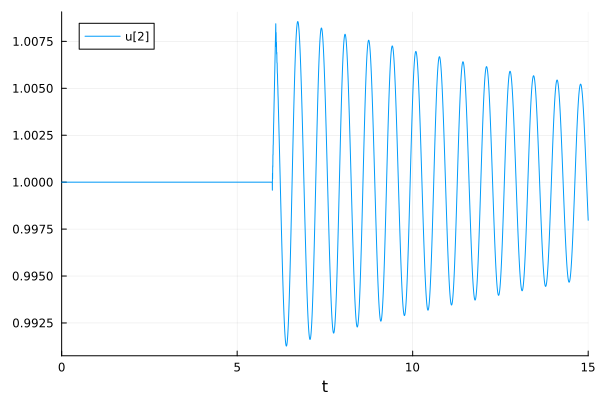

In [34]:
using Plots

plot(sol,idxs=2)

In [40]:
using LinearAlgebra


function fx_wrapper(fx!, u, p)
    du = similar(u)
    fx!(du, u, p, 0.0)
    return du
end

function State_Matrix(J;nx)
    fx = J[1:nx,1:nx]
    fy = J[1:nx,nx+1:end]
    gx = J[nx+1:end,1:nx]
    gy = J[nx+1:end,nx+1:end]

    As = fx - fy*inv(gy)*gx
    # return As
    return fx
end

function Eigz(J;nx)
    As = State_Matrix(J;nx=nx)
    λ = eigen(As).values
    return λ
end

Eigz (generic function with 1 method)

In [41]:
using ForwardDiff
J_dp = ForwardDiff.jacobian(u -> fx_wrapper(fx!, u, p), u0)

12×12 Matrix{Float64}:
  0.0       376.991        0.0       …      0.0           0.0
 -0.0        -0.142857    -0.139697        -0.0          -0.0
  0.0         0.0        -37.6991       -2513.27          0.0
  0.0         0.0       -376.991            0.0       -2513.27
  0.0         0.0          0.0           1904.0           0.0
  0.0         0.0          0.0       …      0.0        1904.0
  0.0         0.0          0.0              1.0e-100      0.0
  0.0         0.0          0.0              0.0           1.0e-100
  0.542876    0.0          0.0              0.0           0.0
 -0.940688    0.0          0.24             0.0           0.0
  0.0         0.0         -1.0       …      0.0           0.0
  0.0         0.0          0.0              0.0           0.0

In [16]:
nx = 6

λ = Eigz(J_dp,nx=nx)

6-element Vector{ComplexF64}:
 -4.417269670502012e103 + 0.0im
  -4.41726967050201e103 + 0.0im
  -6.709681858826322e85 - 3.309383634330808e87im
  -6.709681858826322e85 + 3.309383634330808e87im
                    0.0 + 0.0im
                    0.0 + 0.0im

In [39]:
nx = 6

λ = Eigz(J_dp,nx=nx)

6-element Vector{ComplexF64}:
 -4.417269670502012e103 + 0.0im
  -4.41726967050201e103 + 0.0im
  -6.709681858826322e85 - 3.309383634330808e87im
  -6.709681858826322e85 + 3.309383634330808e87im
                    0.0 + 0.0im
                    0.0 + 0.0im

In [28]:
nx = 6

λ = Eigz(J_dp,nx=nx)

6-element Vector{ComplexF64}:
 -37.69911184307752 - 376.99111843077515im
 -37.69911184307752 + 376.99111843077515im
 -37.69911184307751 - 376.99111843077515im
 -37.69911184307751 + 376.99111843077515im
               -0.0 + 0.0im
                0.0 + 0.0im

In [44]:
nx = 6

λ = Eigz(J_dp,nx=nx)

6-element Vector{ComplexF64}:
   -37.69911184307752 - 376.99111843077515im
   -37.69911184307752 + 376.99111843077515im
   -37.69911184307751 - 376.99111843077515im
   -37.69911184307751 + 376.99111843077515im
 -0.14285714285714285 + 0.0im
                  0.0 + 0.0im